In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from keras.datasets import mnist

import warnings
warnings.filterwarnings("ignore")

2021-11-21 22:37:34.392921: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-21 22:37:34.392938: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# load dataset and divide into train and test
(_, _), (X, y) = mnist.load_data()

In [3]:
X = X[:10000, :, :]
y = y[:10000]

In [4]:
X = X.reshape(10000, 28*28)

In [5]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# normalizing the data
X = X / 255

In [7]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.10047663 0.07544487 0.06140516 0.05425807 0.05031249 0.04246363
 0.03311404 0.02950288 0.02729858 0.02278041 0.02133899 0.02095204
 0.01725898 0.01685758 0.01576077 0.01494562 0.01302506 0.01278467
 0.01180118 0.011483   0.0106641  0.01027178 0.00979715 0.00901867
 0.00888231 0.00826573 0.00799743 0.00765838 0.00717514 0.00687256
 0.00649144 0.00627159 0.00590284 0.00581759 0.00544738 0.00541655
 0.00507243 0.00481121 0.00460166 0.00451523 0.00437027 0.00424364
 0.00412964 0.00389631 0.00378241 0.00370461 0.00358284 0.00331726
 0.00326815 0.00311842 0.00304071 0.00297839 0.00288487 0.00278702
 0.00273021 0.00262965 0.00254963 0.00253014 0.00244553 0.00241445
 0.00234363 0.00233339 0.00223071 0.0021553  0.00208822 0.00202329
 0.00199522 0.00188604 0.00187195 0.00185669 0.00180588 0.00174369
 0.00170453 0.00164326 0.00164066 0.00157377 0.00154559 0.00148286
 0.00143052 0.00139118 0.00137763 0.00134183 0.00131815 0.00131228
 0.00129521 0.00125073 0.00122568 0.00121606 0.00117083 0.0011

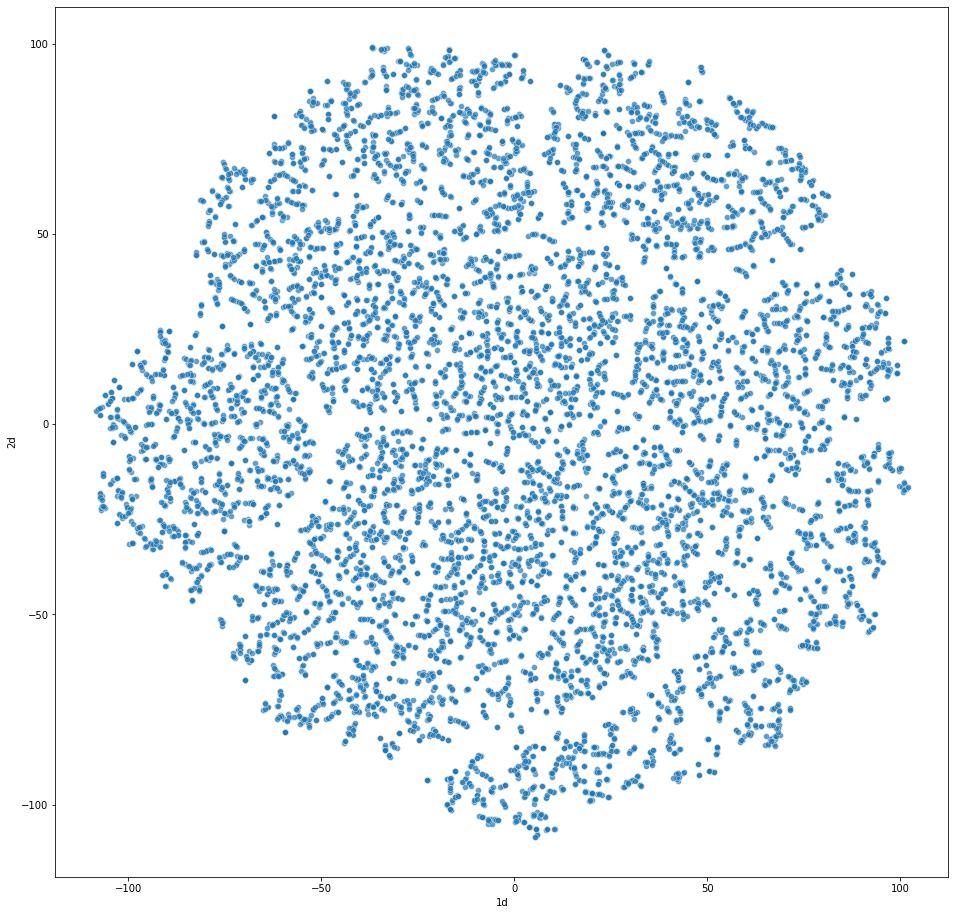

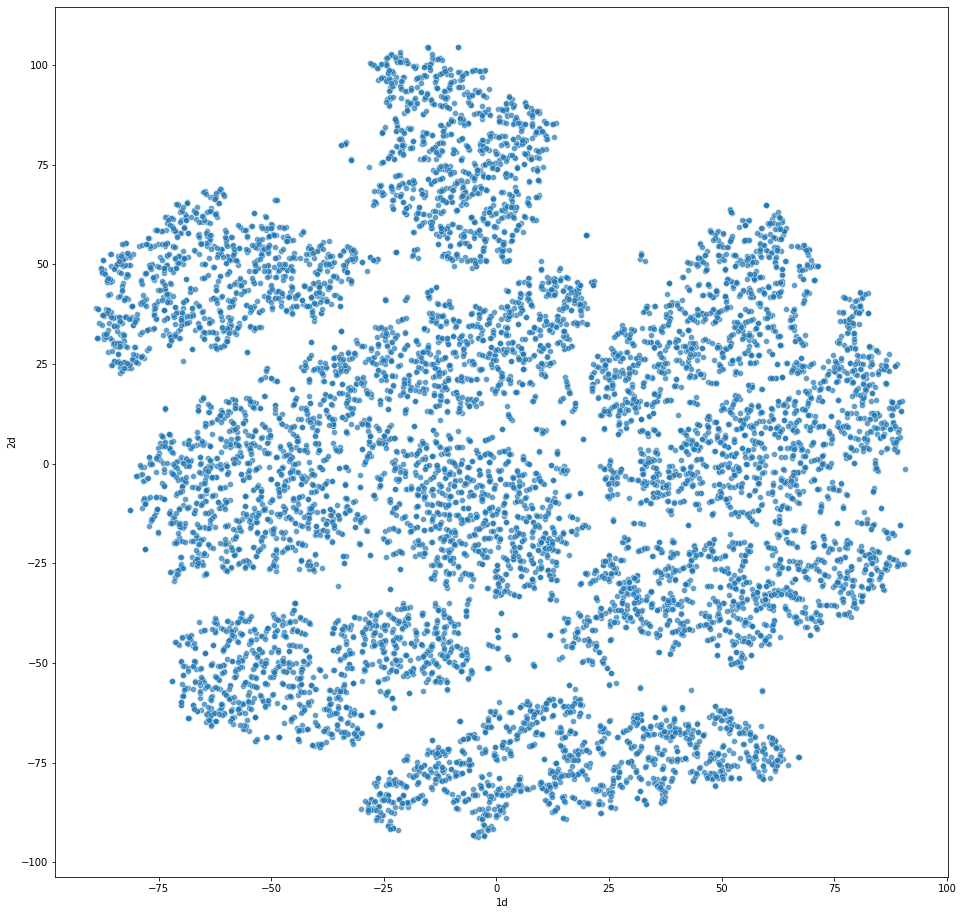

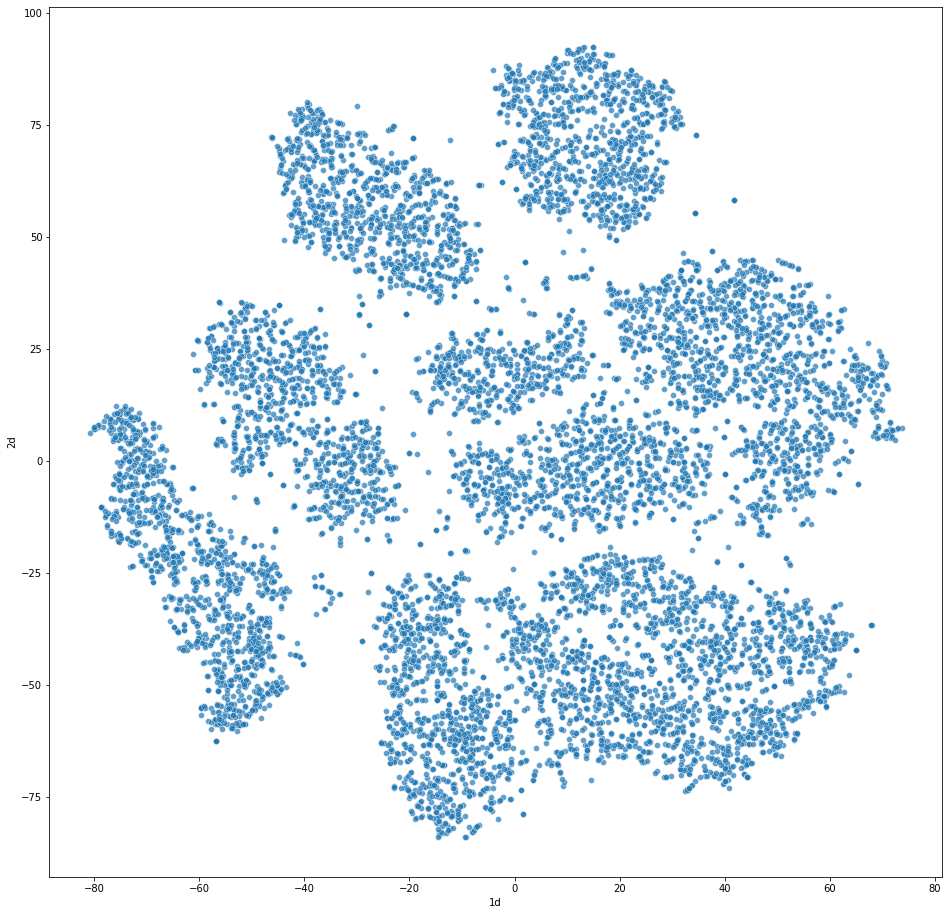

In [9]:
list_perp = [5, 15, 30]

for perp in list_perp:
    X_embedded = TSNE(n_components=2,
                      learning_rate='auto',
                      init='random',
                      perplexity=perp).fit_transform(X_pca)
    
    df_tsne = pd.DataFrame()
    df_tsne["1d"] = X_embedded[:, 0]
    df_tsne["2d"] = X_embedded[:, 1]
    df_tsne["real_classes"] = y


    plt.figure(figsize=(16, 16))
    sns.scatterplot(x="1d", y="2d", data=df_tsne, legend="full", alpha=0.7)

<AxesSubplot:xlabel='1d', ylabel='2d'>

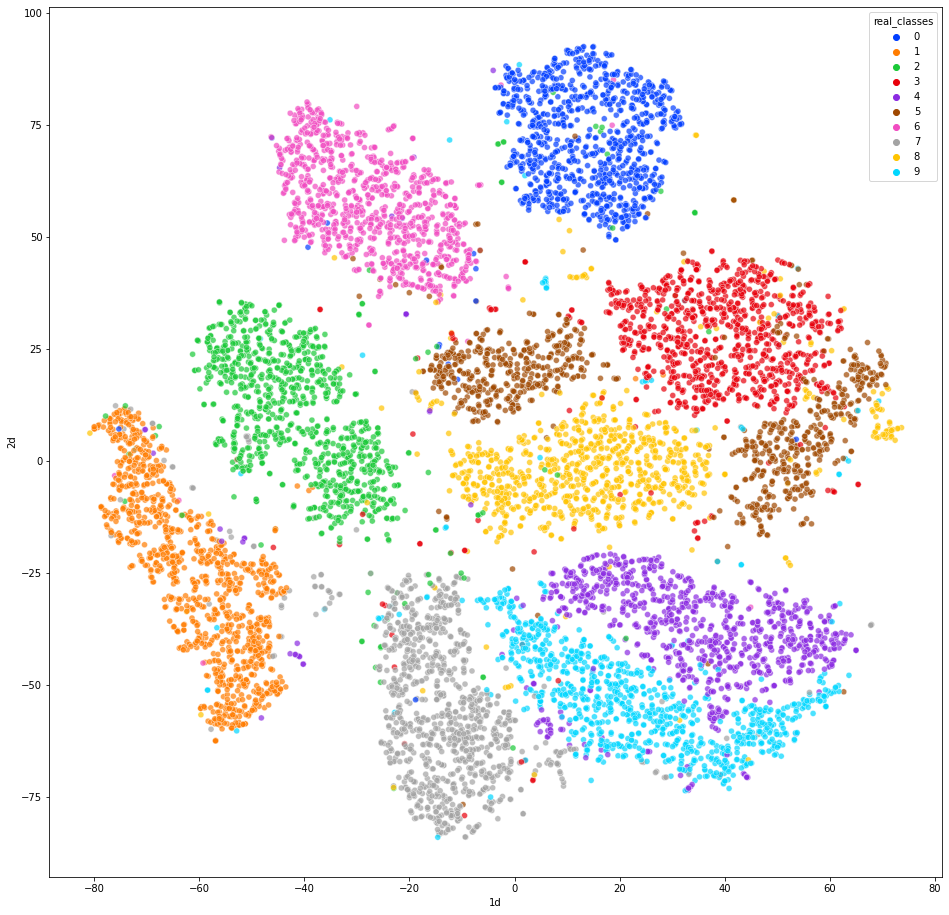

In [10]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x="1d", y="2d", data=df_tsne, legend="full", alpha=0.7, hue="real_classes", palette="bright")